**The below code imports useful libraries and prepares our data points.**

In [46]:
# Importing Libraries.
import matplotlib.pyplot as plt
import numpy as np

# Data points as a list of tuples.
data = [(0.13, 0.55), (0.64, 1.0), (5.8, 2.2), (102, 4.0), (210, 6.5), (2030, 12.0), (3900, 16.0)]

**The below code gets the log our x and y coordinates from our above data as separate arrays. Then we find a line of best fit for the log of the sample data and plot the sample points and the line of best fit. Numpy (the python library which approximates line of best fit), does not return a line equation; but instead a list of y coordinates. Hence we calculate the slope and y-intercept of our line equation after the fact and then label the plot**

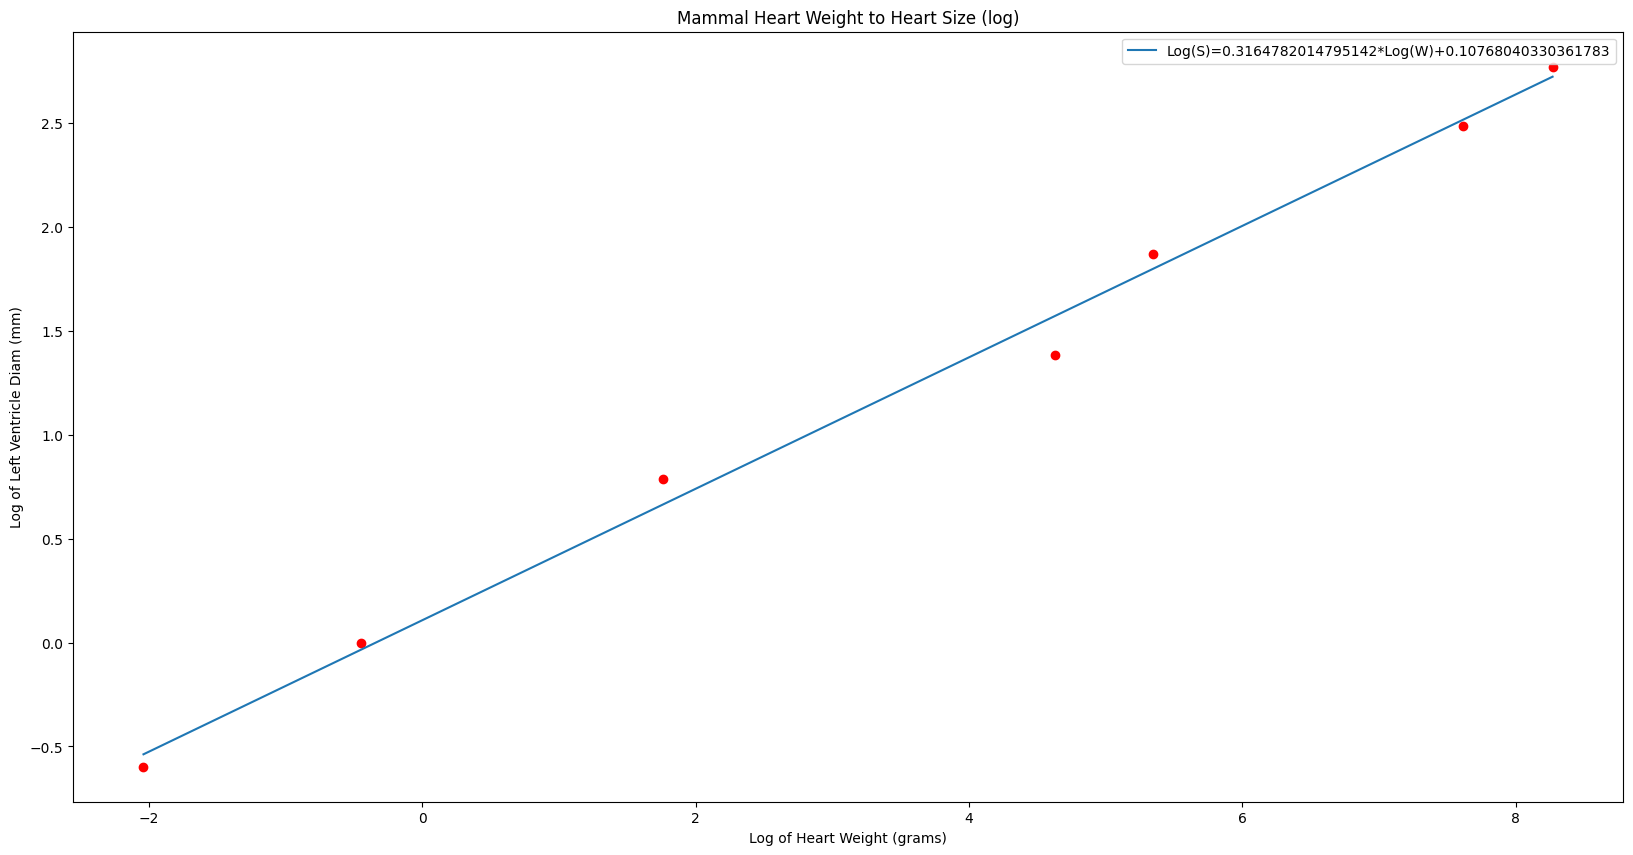

In [47]:
# Declare how large the figure will be.
plt.figure(figsize=(20,10))

# Plot the log of our sample data as red points.
for point in data:
    plt.plot(np.log(point[0]), np.log(point[1]), 'ro')

# Get the log of each x coordinate and each y coordinate in separate lists.
x = [np.log(tup[0]) for tup in data]
y = [np.log(tup[1]) for tup in data]

# Find the line of best fit using numpy (a python data library).
line_of_fit = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))

# Calculate the slope and y-intercept of our line
slope = (line_of_fit[1] - line_of_fit[0])/ (x[1] - x[0])
y_int = line_of_fit[0] - (x[0] * slope)

# Plot the line of best fit
plt.plot(np.unique(x), line_of_fit, label=f'Log(S)={slope}*Log(W)+{y_int}')

# Title and Label our graph
plt.title('Mammal Heart Weight to Heart Size (log)')
plt.xlabel('Log of Heart Weight (grams)')
plt.ylabel('Log of Left Ventricle Diam (mm)')
plt.legend()

# Display the graph
plt.show()

**This code plots our original data points and then (using the line we found in the previous cell), we calculate the log function which should fit our data the best and plot it.**

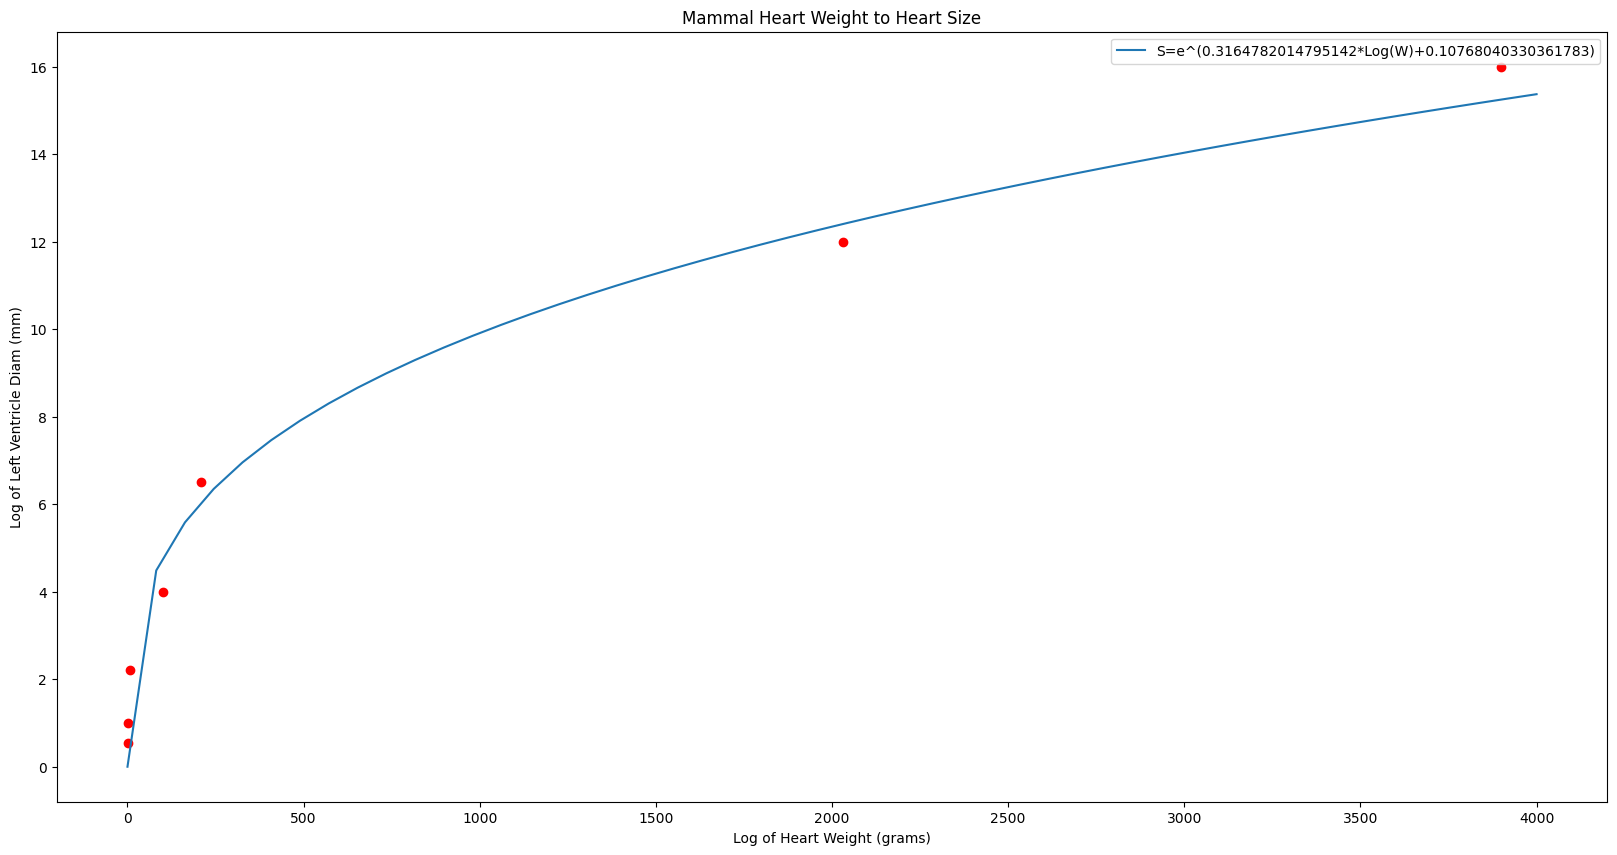

In [48]:
# Declare how large the figure will be.
plt.figure(figsize=(20,10))

# Plot our original data.
for point in data:
    plt.plot(point[0], point[1], 'ro')

# Matplotlib plots lines by connecting points, thus to plot a smooth function we need a bunch of points so that when zoomed out; it looks smooth.
# Therefore below we make our x points an array contained 0,1,2,...,4000.
x_lin = np.linspace(0, 4000)

# We get the log of our y coordinate based on the equation we found in the previous cell. 
y_log = (np.log(x_lin) * slope) + y_int

# We raise e to the power of that log.
y_lin = np.exp(y_log)

# We plot our log function.
plt.plot(x_lin, y_lin, label=f'S=e^({slope}*Log(W)+{y_int})')

# Label the figure.
plt.title('Mammal Heart Weight to Heart Size')
plt.xlabel('Log of Heart Weight (grams)')
plt.ylabel('Log of Left Ventricle Diam (mm)')
plt.legend()

# Display the figure.
plt.show()

**The below code finds the error for each point, the residual sum of squared errors, the total sum of squares, and the R^2 for our line.**

In [49]:
# Prepare the lists for errors and deviation from mean.
errors = []
dev_from_mean = []

# Get the mean for our sample y coordinates.
mean_obs = np.mean(y)

# Get the error and deviation from mean for each observed y.
for obs, exp in zip(y, line_of_fit):
    errors.append(obs - exp)
    dev_from_mean.append(obs - mean_obs)

# Display the errors and deviations from mean.
print('Errors are: ', errors)
print('Deviations from mean are: ', dev_from_mean)

# Get the residual sum of squared errors and total sum of squares.
rss = np.sum(np.power(errors, 2))
tss = np.sum(np.power(dev_from_mean, 2))

# Print the rss and tss.
print('Residual Sum of Squared Errors is: ', rss)
print('Total Sum of Squares is: ', tss)

# Find the R^2 value.
r2 = 1 - (rss / tss)

# Print the R^2 value.
print('R^2 is: ', r2)

Errors are:  [-0.05983198562610981, 0.03355973627972772, 0.12445324485715303, -0.18508912002358247, 0.07187879915894269, -0.0330056148372595, 0.0480349401911333]
Deviations from mean are:  [-1.8415816107067509, -1.2437446099511305, -0.4552872495868602, 0.14254975116876012, 0.6280575669504609, 1.24116203983687, 1.5288441122886507]
Residual Sum of Squared Errors is:  0.06301600276818939
Total Sum of Squares is:  9.438234231085827
R^2 is:  0.993323327094316
